# Introduction to Data Science
## Homework 4 

Student Name: Kavitha Vishwanathan

Student Netid: kv668
***

### Part 1: Profit
1\. Imagine that you work for an online advertising company that has just been hired to advertise a new local restaurant online. Let's say that it costs \$0.015 to present a coupon ad to online consumers. If a consumer cashes in your coupon, you stand to earn \$5. Given this information, what would your cost/benefit matrix be?  Explain your reasoning briefly.

In [110]:
import pandas as pd
cost_matrix = pd.DataFrame([[4.985, -0.015], [0, 0]], columns=['p', 'n'], index=['Y', 'N'])

# Don't delete this line
print cost_matrix

       p      n
Y  4.985 -0.015
N  0.000  0.000


**ANSWER:**
#(Y,p) -> A true positive occurs when a customer who is offered a coupon accepts it. The benefit here is the profit from the coupon minus the cost incured to present a coupon (ans: 5 - 0.015 = 4.985)
#(Y,n) -> A false positive occurs when the customer we predicted as a responder, does not uses the coupon. Here our cost will be the cost incured to present a coupon (ans: -0.015)
#(N,p) -> A false negative occurs when a customer we predicted not likely to be a responder,but would have used the coupon if presented. Here no money was spent and gained (ans: 0)
#(N,n) -> A true negative occurs when the customer we predicted not likely to be a responder is actually customer who would not have cashed the coupon. Here there is no profit and no cost (ans: 0)

### Part 2: Basic evaluations
For this part of the assignment, we are going to use a churn data set located in `data/churn.csv`. The first 11 columns are predictor variables.

```
COLLEGE                       college educated?
INCOME                        income
OVERAGE                       average overcharges per month
LEFTOVER                      average % leftover minutes per month
HOUSE                         value of dwelling (from census tract)
HANDSET_PRICE                 cost of phone
OVER_15MINS_CALLS_PER_MONTH   average number of long calls per month
AVERAGE_CALL_DURATION         average call duration
REPORTED_SATISFACTION         reported level of satisfaction
REPORTED_USAGE_LEVEL          self-reported usage level
CONSIDERING_CHANGE_OF_PLAN    was customer considering changing plan?
```

The last column, `LEAVE`, is the target variable that equals one if the user left and zero if they stayed.

1\. Load the data into a pandas `DataFrame()`.

In [111]:
import pandas as pd
data = pd.read_csv("data/churn_data.csv")
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0
4,0,133728,64,48,632969,626,3,2,unsat,high,no,0


2\. Three of the columns, `REPORTED_SATISFACTION`, `REPORTED_USAGE_LEVEL`, and `CONSIDERING_CHANGE_OF_PLAN` are categorical variables. Use the techniques we discussed in class to turn these into dummy variables.

In [112]:
for field in ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']:
    # Go through each possible value except the last one
    for value in data[field].unique()[0:-1]:
        # Create a new binary field
        data[field + "_" + value] = pd.Series(data[field] == value, dtype=int)

    # Drop the original field
    data = data.drop([field], axis=1)

3\. Put all of the predictors into a data frame called `X` and the target variable in a data frame called `Y`.

In [113]:
X = data.drop(['LEAVE'], axis=1)
Y = data['LEAVE']

3\. Create `LogisticRegression()` and `DecisionTreeClassifier()` models. For the decision tree, use `criterion="entropy"`. For all other settings, keep the default values. Use 3-fold cross validation to obtain the accuracy and area under the ROC curve for both models.

In [114]:
# There will be necessary
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# These will be useful
import numpy as np
from sklearn import metrics
from sklearn import cross_validation

model = LogisticRegression()
model.fit(X, Y)

treemodel = DecisionTreeClassifier(criterion="entropy")
treemodel.fit(X, Y)

# You should store your output in these variables
lr_accuracy = np.mean(cross_validation.cross_val_score(model, X, Y, scoring="accuracy"))
lr_auc = np.mean(cross_validation.cross_val_score(model, X, Y, scoring="roc_auc"))
tree_accuracy = np.mean(cross_validation.cross_val_score(treemodel, X, Y, scoring="accuracy"))
tree_auc = np.mean(cross_validation.cross_val_score(treemodel, X, Y, scoring="roc_auc"))

# These lines will be used for grading. Ensure they print what they should.
print "Logistic regression: Accuracy = %.3f, AUC = %.3f" % (lr_accuracy, lr_auc)
print "Tree regression: Accuracy = %.3f, AUC = %.3f" % (tree_accuracy, tree_auc)

Logistic regression: Accuracy = 0.910, AUC = 0.629
Tree regression: Accuracy = 0.850, AUC = 0.556


4\. What measure from above do you think gives a better assessment of model quality? Explain why in **one paragraph**.

**ANSWER:** The Logistic Regression model gives a better assessment than the decision tree. Because the AUC for tree regression (0.560) is just better than the random AUC(0.5). As the value of AUC increases it means that the classifier is better in distinguishing between the positive and negative instance of the target population

5\. Create `LogisticRegression()` and `DecisionTreeClassifier()` models. For the logistic regression find the optimal value for regularization (`C`) using 3-fold cross validation and AUC. Use the same procedure to find the optimal value of `min_samples_split` for the decision tree classifier. For each of these values, try 10 different choices. To show your results, create two plots that show the value of AUC on the y-axis and the parameter values you tried on the x-axis. **Don't forget to label your axes!** Store your best value of C in `best_c` and your best `min_samples_split` in `best_mss`.

In [115]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

5000


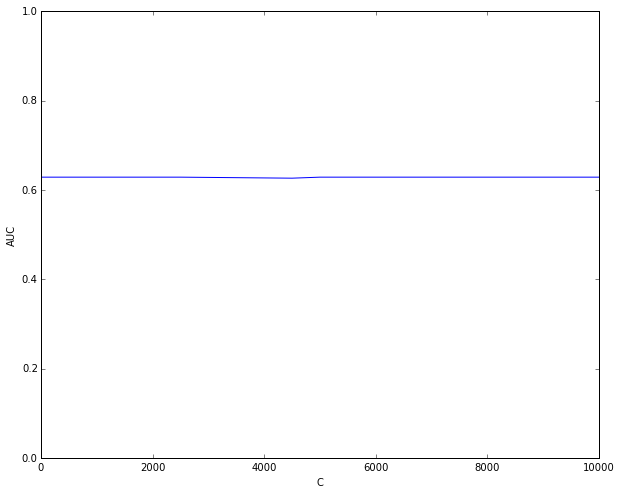

In [116]:
# Code to test and create a plot for LogisticRegression() here
auc = []
C= [0.001, 0.01, 0.1, 1, 100,1000,2500,4500,5000,10000]
for c in C:
    model = LogisticRegression(C=c)
    model.fit(X, Y)

    # Get the area under the curve (AUC)
    auc.append(np.mean(cross_validation.cross_val_score(model, X, Y, scoring="roc_auc")))
    
plt.xlabel("C")
plt.ylabel("AUC")
plt.plot(C,auc)
plt.ylim([0.0, 1])
plt.xlim([0,10000])

indexAUC = auc.index(max(auc))
best_c = C[indexAUC]
print best_c

1300


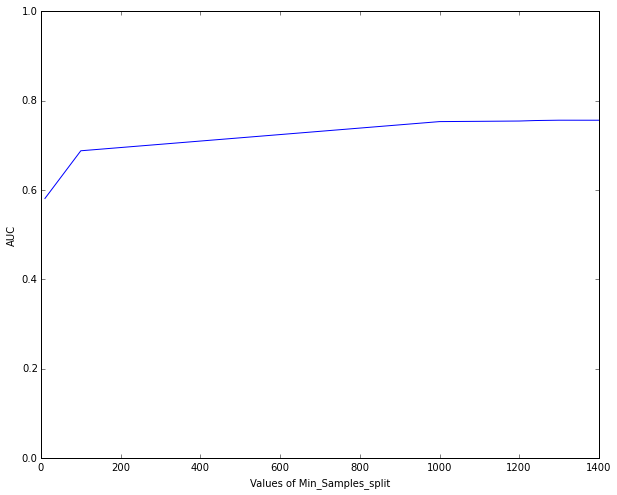

In [96]:
# Code to test and create a plot for DecisionTreeClassifier() here
auc = []
MSS= [10,100,1000,1100,1200,1240,1300,1350,1400]
for mss in MSS:
    model = DecisionTreeClassifier(min_samples_split=mss, criterion="entropy")
    model.fit(X, Y)

    # Get the area under the curve (AUC)
    auc.append(np.mean(cross_validation.cross_val_score(model, X, Y, scoring="roc_auc")))
    
plt.xlabel("Values of Min_Samples_split")
plt.ylabel("AUC")
plt.plot(MSS,auc)
plt.ylim([0.0, 1])
#plt.xlim([0,10000])

indexAUC = auc.index(max(auc))
best_mss = MSS[indexAUC]
print best_mss

6\. Split your data into testing and training sets. Give the training set 75% of the data. Using the best parameters from the previous question, plot the ROC curve for both classifier in the same plot. Make sure your plot has a legend so that you can tell which curve related to which classifier. In addition, place the area under the ROC curve in the legend. **Don't forget to label your axes!** Discuss your observations.

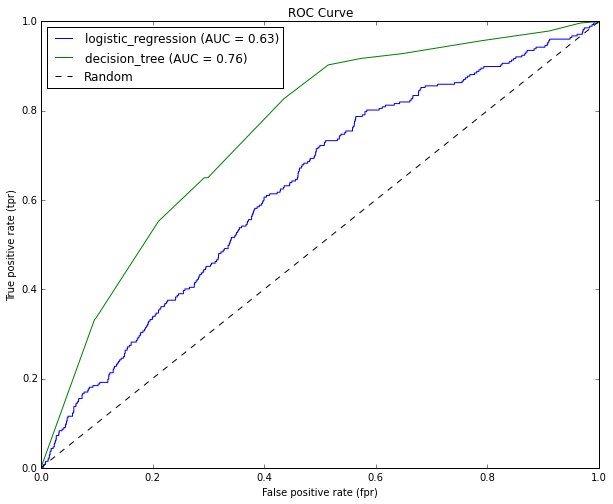

In [117]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
model_types = ["logistic_regression", "decision_tree"]

for model_type in model_types:
    # Instantiate the model
    if model_type == "decision_tree":
        model = DecisionTreeClassifier(criterion="entropy", min_samples_split=best_mss)
    elif model_type == "logistic_regression":
        model = LogisticRegression(C=best_c)
    model.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)

    # Get the area under the curve (AUC)
    acc = np.mean(cross_validation.cross_val_score(model, X, Y, scoring="accuracy"))
    auc = np.mean(cross_validation.cross_val_score(model, X, Y, scoring="roc_auc"))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=model_type + " (AUC = " + str(round(auc, 2)) + ")")
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.title("ROC Curve")
plt.legend(loc=2)

**ANSWER:** As we see the curve corressponding to the decision tree is more bowed than the logistic regression, thus saying that decision model is a better one because of it's predictive superiority. If we take any corresponding points from the two models, if one lies in northwest to the other, then that classifier is superior. Because it means that Tp rate is higher and fp rate is lower. Thus from the above graph, even if we didn't know the AUC, we can find the better model by comparing the two plots

### Part 3: Profits, benefits, and costs
For these questions, we are going to use the same data from above.

1\. Despite all your retention efforts, customers still are leaving your company, and when a customer leaves the company incurs various costs.   The company has created a cost-reduction plan (CRP) for those who do churn, separate from the ongoing retention efforts.  The CRP will be targeted to those most likely to churn, based on a model you build.  If the plan is given to someone who indeed churns, the company's cost will be reduced by \$15.  The cost of enacting the plan for a customer is \$2.  What would your cost matrix be in this case?  Give a short explanation for your reasoning.

In [121]:
### import pandas as pd
cost_matrix = pd.DataFrame([[13, -2], [0, 0]], columns=['p', 'n'], index=['Y', 'N'])

# Don't delete this line
print cost_matrix

    p  n
Y  13 -2
N   0  0


**ANSWER:**
#(Y,p) -> A true positive occurs when a customer who is offered a plan, continue in the company. The benefit here is the profit from the plan minus the cost incured to present a plan (ans: 15 - 2 = 13)
#(Y,n) -> A false positive occurs when the customer we predicted will retain in the company, does churns. Here our cost will be the cost incured to present a plan (ans: -2)
#(N,p) -> A false negative occurs when a customer we predicted will retain in the company, but would have retained in the company if given the plan. Here no money was spent and gained (ans: 0)
#(N,n) -> A true negative occurs when the customer we predicted not likely to be a retained is actually customer who would have left the company. Here there is no profit and no cost (ans: 0)

2\. Use the model from Part 2 Question 6 that gave the best AUC and use it to plot a profit curve.

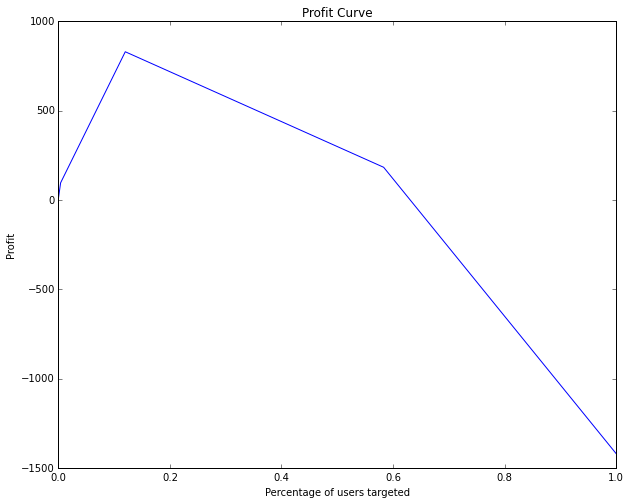

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

model = DecisionTreeClassifier(criterion="entropy", min_samples_split=best_mss)
model.fit(X_test, Y_test)

probabilities = model.predict_proba(X_test)[:, 1]
#print probabilities

# Get the false positive rate, true positive rate, and all thresholds
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
Size_targeted_pop = float(len(Y_test))

# What is the baseline probability of being positive or negative in the data set?
p_p = np.sum(Y_test)/float(len(Y_test))
p_n = 1 - np.sum(Y_test)/float(len(Y_test))

# How many users are above the current threshold?
n_targeted = []
for t in thresholds:
    n_targeted.append(np.sum(probabilities >= t))

# Turn these counts to percentages of users above the threshold
n_targeted = np.array(n_targeted)/float(len(Y_test))

# Expected profits:
expected_profits = (cost_matrix['p']['Y']*(tpr*p_p)) + (cost_matrix['n']['Y']*(fpr*p_n))

# Plot the profit curve
plt.plot(n_targeted, Size_targeted_pop*expected_profits)
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profit Curve")

3\. Approximately how many of your customers would you target?

**ANSWER:** If we have unlimited resources then we can maximize the profit by choosing top 15% of customers on the list. If my budget is constrained, I would calculate my resources and target the highest ranked customers based on my budget